# Análisis de Datos

In [37]:
# Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

In [38]:
# Cargar el conjunto de datos Titanic
df = sns.load_dataset('titanic')

In [39]:
# Columna objetivo
target_column = 'survived'

## EDA

### 1-. EDA (textual)

In [40]:
# --- TÍTULO GENERAL ---
print(f'{'~'*50}')
print('EXPLORACIÓN TEXTUAL')
print(f'{'~'*50}\n')

# --- Primeros y últimos registros ---
print(f'{'-'*30}\nPrimeros registros:\n{'-'*30}')
display(df.head(5))

print(f'{'-'*30}\nÚltimos registros:\n{'-'*30}')
display(df.tail(5))

print(f'\n{'='*50}\n')

# --- Información, dimensión, columna y tipo de dato ---
print(f'{'-'*30}\nInformación:\n{'-'*30}')
display(df.info())

print(f'{'-'*30}\nDimensión:\n{'-'*30}')
display(df.shape)

print(f'{'-'*30}\nColumna y tipo de dato:\n{'-'*30}')
display(pd.DataFrame(df.dtypes, columns=['Tipo de dato']))

print(f'\n{'='*50}\n')

# --- Descripción estadística, moda, varianza, rango y cardinalidad ---
print(f'{'-'*30}\nDescripción estadística:\n{'-'*30}')
resumen = df.describe(include='all').T
resumen.insert(2, 'mode', df.mode().iloc[0])
resumen.insert(5, 'var', df.select_dtypes(include=[np.number]).var())
resumen['range'] = df.select_dtypes(include=[np.number]).max() - df.select_dtypes(include=[np.number]).min()
resumen['unique'] = df.nunique()
display(resumen.drop(columns=['top', 'freq']))

print(f'\n{'='*50}\n')

# --- Distribución ---
print(f'{'-'*30}\nDistribución:\n{'-'*30}')
for col in df.select_dtypes(include=['object']).columns:
    print(f'\n ° {col}:')
    display(pd.DataFrame({
        'Conteo': df[col].value_counts(), 
        'Porcentaje': (df[col].value_counts(normalize=True) * 100).round(2)
    }))

print(f'\n{'='*50}\n')

# --- Nulos, duplicados y valores atípicos ---
print(f'{'-'*30}\nNulos:\n{'-'*30}')
display(pd.DataFrame({
    'Conteo': df.isnull().sum(), 
    'Porcentaje': (df.isnull().mean() * 100).round(2)
}))

print(f'{'-'*30}\nDuplicados:\n{'-'*30}')
display(pd.DataFrame({
    'Conteo': [df.duplicated().sum()], 
    'Porcentaje': [(df.duplicated().mean() * 100).round(2)]
}))

print(f'{'-'*30}\nValores atípicos:\n{'-'*30}')
atipicos = {}
for col in df.select_dtypes(include=[np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    conteo_atipicos = df[(df[col] < limite_inferior) | (df[col] > limite_superior)].shape[0]
    atipicos[col] = {
        'Conteo': conteo_atipicos,
        'Porcentaje': round(conteo_atipicos / df.shape[0] * 100, 2)
    }
display(pd.DataFrame(atipicos).T)

print(f'\n{'='*50}\n')

# --- Uso de memoria ---
print(f'{'-'*30}\nUso de memoria:\n{'-'*30}')
display(df.memory_usage(deep=True).to_frame('Bytes'))

print(f'\n{'~'*50}')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
EXPLORACIÓN TEXTUAL
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------
Primeros registros:
------------------------------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


------------------------------
Últimos registros:
------------------------------


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True




------------------------------
Información:
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


None

------------------------------
Dimensión:
------------------------------


(891, 15)

------------------------------
Columna y tipo de dato:
------------------------------


,Tipo de dato
survived,int64
pclass,int64
sex,object
age,float64
sibsp,int64
parch,int64
fare,float64
embarked,object
class,category
who,object




------------------------------
Descripción estadística:
------------------------------


,count,unique,mode,var,mean,std,min,25%,50%,75%,max,range
survived,891.0,2,0,0.236772,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0,1.0000
pclass,891.0,3,3,0.699015,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0,2.0000
sex,891,2,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,714.0,88,24.0,211.019125,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0,79.5800
sibsp,891.0,7,0,1.216043,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0,8.0000
parch,891.0,7,0,0.649728,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0,6.0000
fare,891.0,248,8.05,2469.436846,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292,512.3292
embarked,889,3,S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
class,891,3,Third,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who,891,3,man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




------------------------------
Distribución:
------------------------------

 ° sex:


,Conteo,Porcentaje
sex,,
male,577,64.76
female,314,35.24



 ° embarked:


,Conteo,Porcentaje
embarked,,
S,644,72.44
C,168,18.90
Q,77,8.66



 ° who:


,Conteo,Porcentaje
who,,
man,537,60.27
woman,271,30.42
child,83,9.32



 ° embark_town:


,Conteo,Porcentaje
embark_town,,
Southampton,644,72.44
Cherbourg,168,18.90
Queenstown,77,8.66



 ° alive:


,Conteo,Porcentaje
alive,,
no,549,61.62
yes,342,38.38




------------------------------
Nulos:
------------------------------


,Conteo,Porcentaje
survived,0,0.00
pclass,0,0.00
sex,0,0.00
age,177,19.87
sibsp,0,0.00
parch,0,0.00
fare,0,0.00
embarked,2,0.22
class,0,0.00
who,0,0.00


------------------------------
Duplicados:
------------------------------


,Conteo,Porcentaje
0,107,12.01


------------------------------
Valores atípicos:
------------------------------


,Conteo,Porcentaje
survived,0.0,0.00
pclass,0.0,0.00
age,11.0,1.23
sibsp,46.0,5.16
parch,213.0,23.91
fare,116.0,13.02




------------------------------
Uso de memoria:
------------------------------


,Bytes
Index,132
survived,7128
pclass,7128
sex,47851
age,7128
sibsp,7128
parch,7128
fare,7128
embarked,44514
class,1162



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


### 2-. EDA (visual)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
EXPLORACIÓN VISUAL
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------
Histogramas:
------------------------------


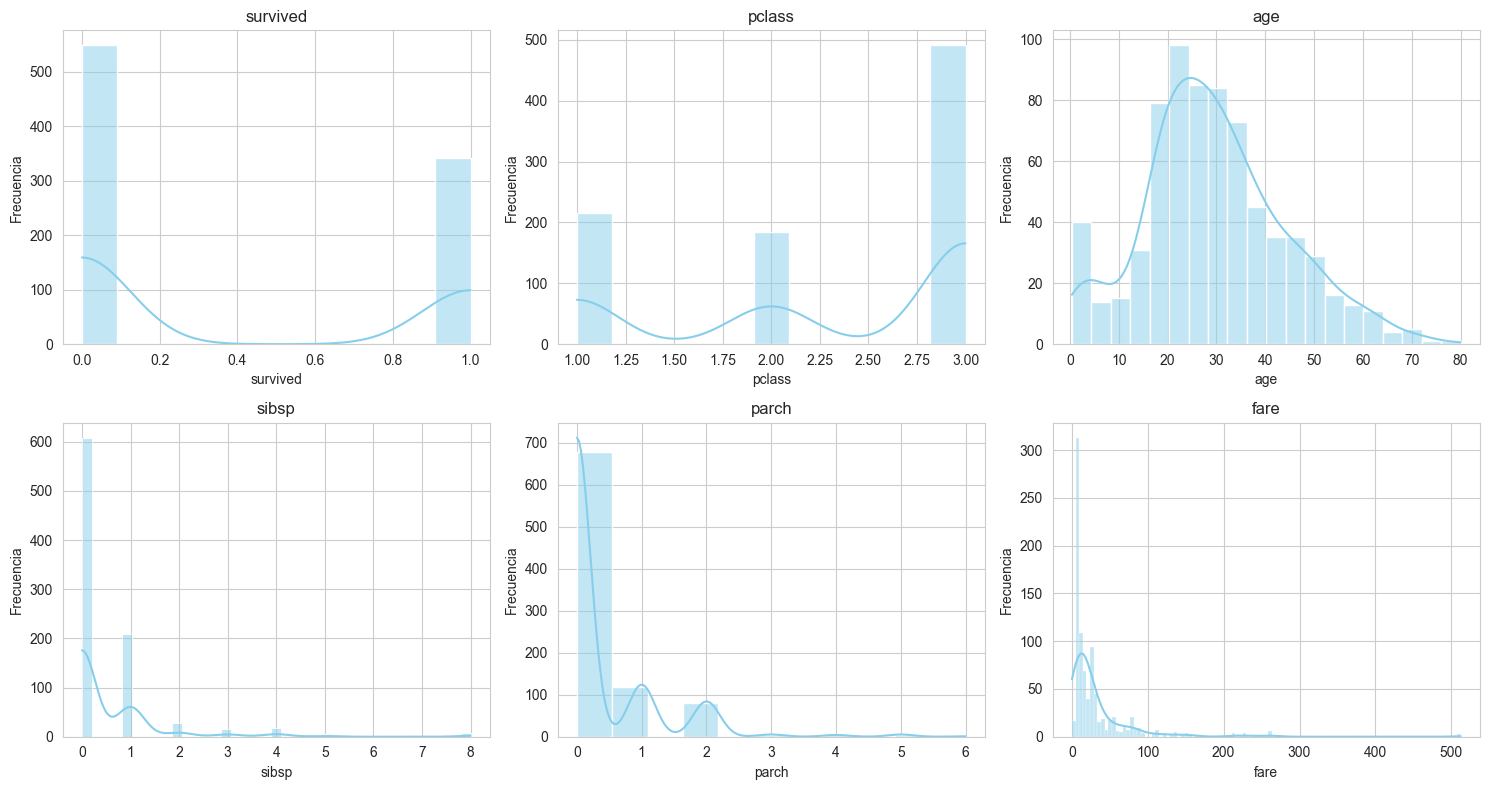



------------------------------
Diagramas de caja:
------------------------------


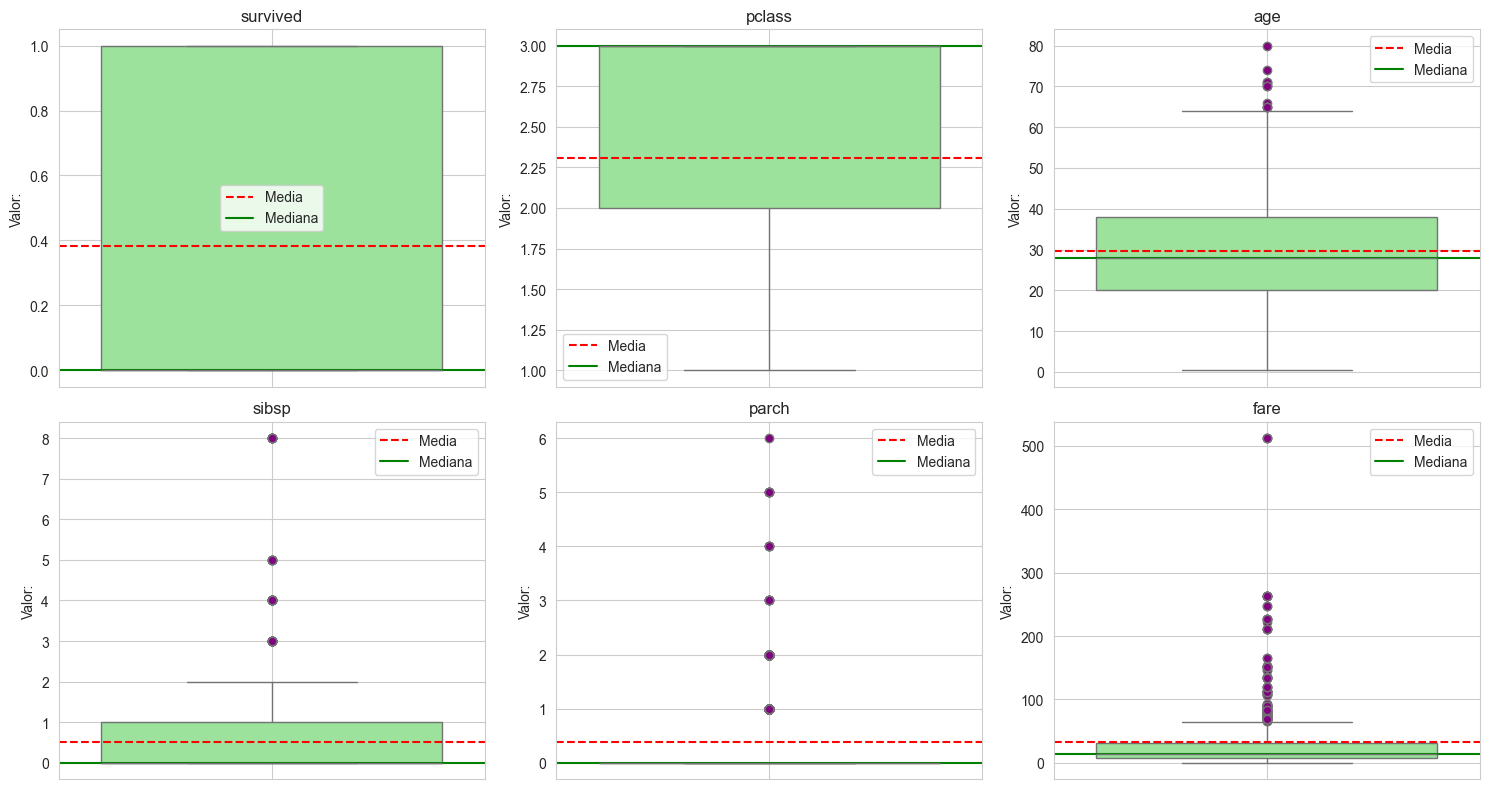



------------------------------
Gráficas de barras:
------------------------------


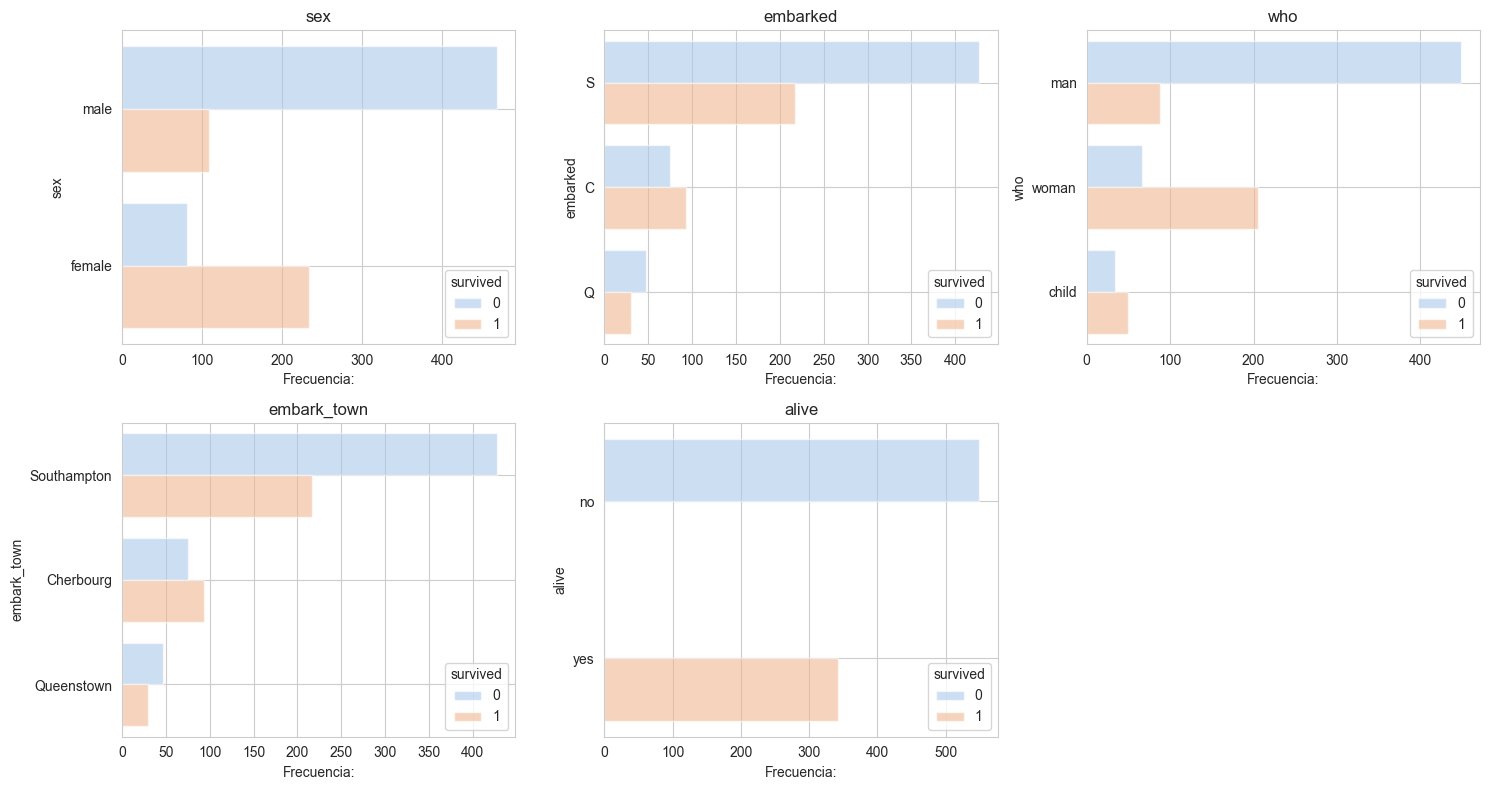



------------------------------
Matriz de correlación:
------------------------------


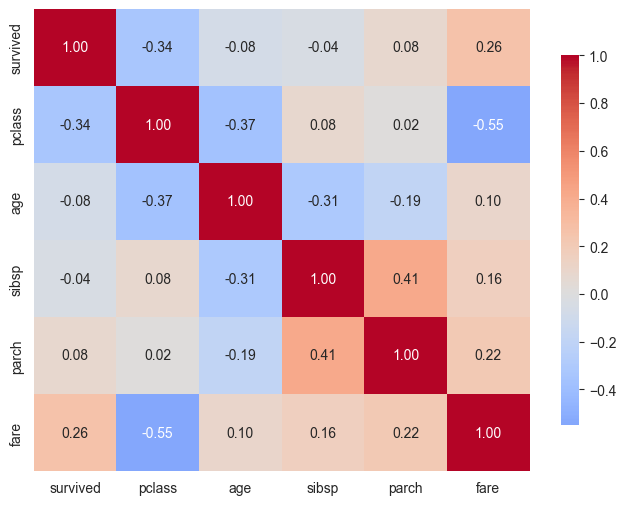



------------------------------
Gráficas bivariadas:
------------------------------


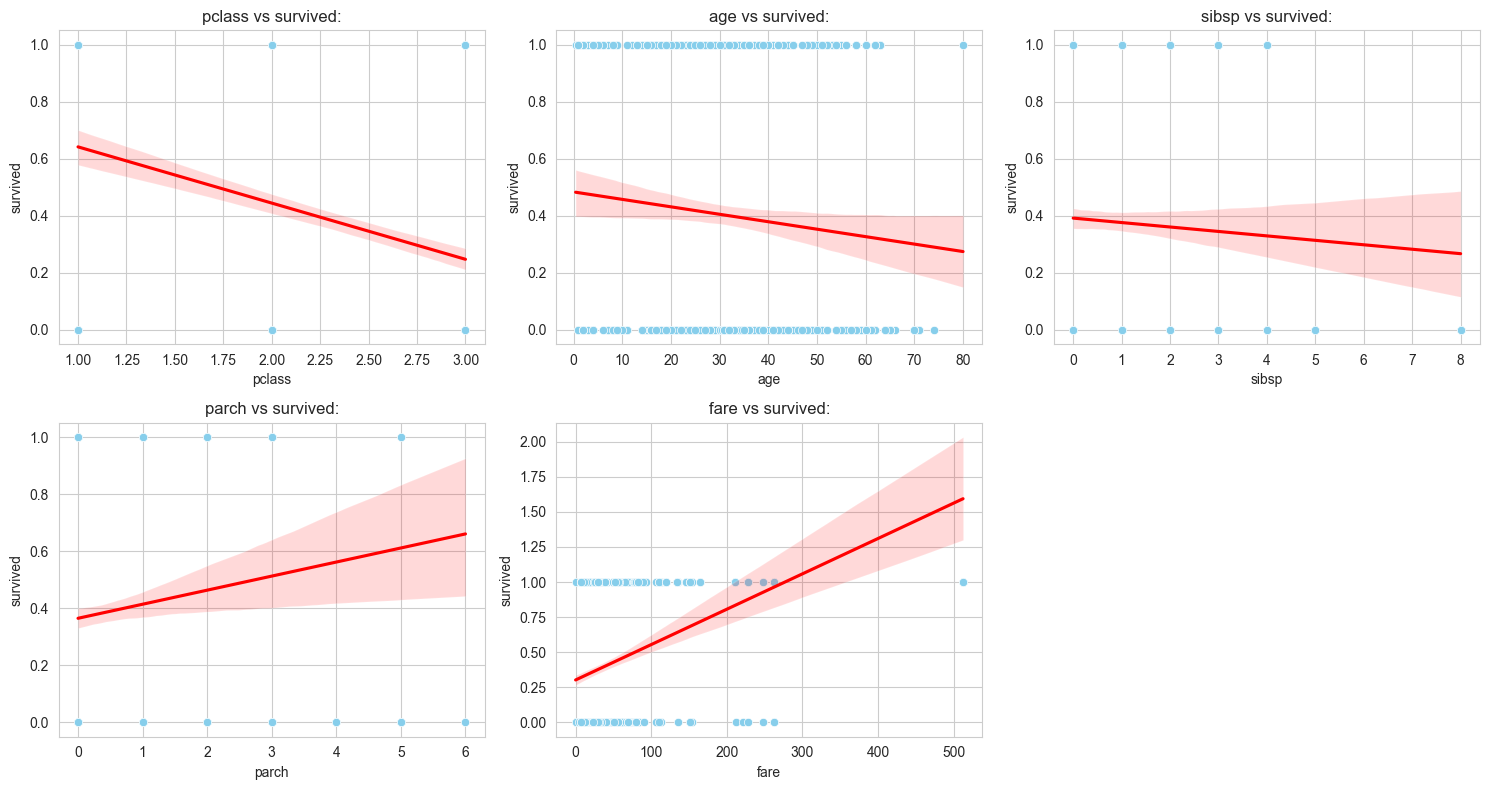



------------------------------
Gráficas de violín:
------------------------------


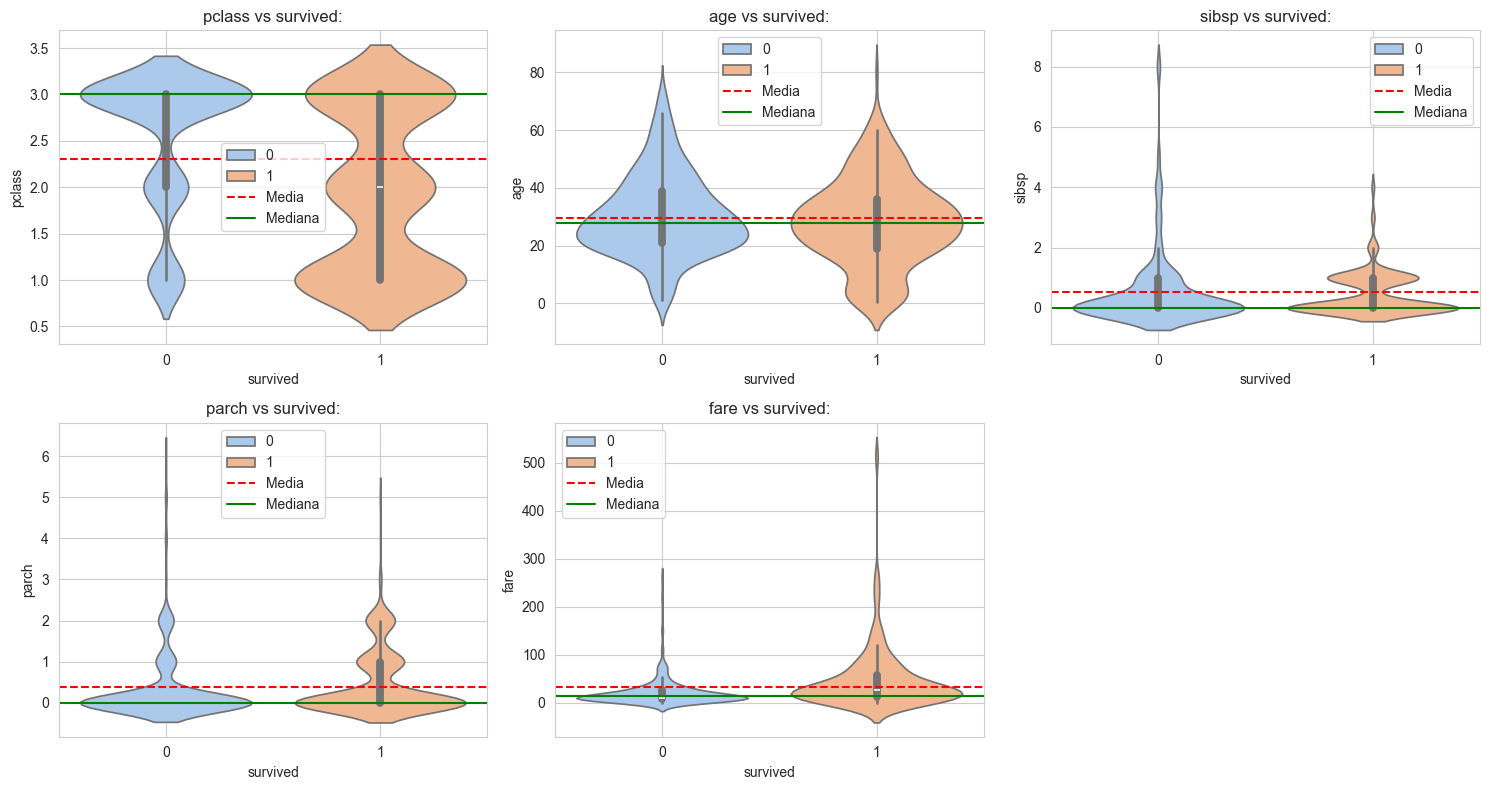


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [55]:
# --- TÍTULO GENERAL ---
print(f'{'~'*50}')
print('EXPLORACIÓN VISUAL')
print(f'{'~'*50}\n')

# --- Configuración de despliegue ---
num_cols = df.select_dtypes(include=[np.number]).columns
obj_cols = df.select_dtypes(include=['object']).columns
n_num_cols = len(num_cols)
n_obj_cols = len(obj_cols)
cols_per_row = 3
num_rows = (n_num_cols // cols_per_row) + int(n_num_cols % cols_per_row != 0)
obj_rows = (n_obj_cols // cols_per_row) + int(n_obj_cols % cols_per_row != 0)

# --- Configuración de estilo ---
sns.set_palette('pastel')
sns.set_style('whitegrid')
tight_layout = True

# --- Histogramas ---
print(f'{'-'*30}\nHistogramas:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Diagramas de caja ---
print(f'{'-'*30}\nDiagramas de caja:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(df[col], ax=axes[i], color='lightgreen', flierprops=dict(markerfacecolor='purple', marker='o'))
    axes[i].axhline(df[col].mean(), color='red', linestyle='--', label='Media')
    axes[i].axhline(df[col].median(), color='green', linestyle='-', label='Mediana')
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Valor:')
    axes[i].grid(True)
    axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Gráficos de barras ---
print(f'{'-'*30}\nGráficas de barras:\n{'-'*30}')
fig, axes = plt.subplots(obj_rows, cols_per_row, figsize=(cols_per_row*5, obj_rows*4))
axes = axes.flatten()

for i, col in enumerate(obj_cols):
    sns.countplot(y=df[col], ax=axes[i], alpha=0.6, palette='pastel', order=df[col].value_counts().index, dodge=True, hue=df[target_column] if col != target_column else None)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Frecuencia:')
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Matriz de correlación ---
print(f'{'-'*30}\nMatriz de correlación:\n{'-'*30}')
plt.figure(figsize=(8, 6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap='coolwarm', annot=True, fmt=".2f", cbar_kws={"shrink": .8}, center=0)
plt.show()

print(f'\n{'='*50}\n')

# --- Gráficas bivariadas ---
print(f'{'-'*30}\nGráficas bivariadas:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

num_cols_no_target_column = [col for col in num_cols if col != target_column]

for i, col in enumerate(num_cols_no_target_column):
    if col != target_column:
        sns.scatterplot(x=df[col], y=df[target_column], ax=axes[i], color='skyblue')
        sns.regplot(x=df[col], y=df[target_column], scatter=False, ax=axes[i], color='red', label='Línea de tendencia')
        axes[i].set_title(f'{col} vs {target_column}:')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_column)
        axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'='*50}\n')

# --- Gráficas de violín ---
print(f'{'-'*30}\nGráficas de violín:\n{'-'*30}')
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(cols_per_row*5, num_rows*4))
axes = axes.flatten()

num_cols_no_target_column = [col for col in num_cols if col != target_column]

for i, col in enumerate(num_cols_no_target_column):
    if col != target_column:
        sns.violinplot(x=df[target_column], y=df[col], ax=axes[i], palette='pastel', hue=df[target_column] if col != target_column else None)
        axes[i].axhline(df[col].mean(), color='red', linestyle='--', label='Media')
        axes[i].axhline(df[col].median(), color='green', linestyle='-', label='Mediana')
        axes[i].set_title(f'{col} vs {target_column}:')
        axes[i].set_xlabel(target_column)
        axes[i].set_ylabel(col)
        axes[i].grid(True)
        axes[i].legend()

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print(f'\n{'~'*50}')

### 3-. Limpieza

### 4-. Métricas

### 5-. Reporte